# DZ 1 Немного EDA для маркетинговых данных

Вам предложены данные iFood — приложения для доставки еды в Бразилии, представленного более чем в тысяче городов.
Поддержание высокой вовлеченности клиентов является важной задачей для компании. Для того, чтобы создавать новые предложения и проводить качественные рекламные кампании, необходимо понимать особенности и потребности целевой аудитории. Для этого были собраны данные о клиентах, использующих приложение. Вам предстоит выявить особенности людей, пользующихся данным приложением и найти интересные закономерности.

Почитать про компанию можно, например, на википедии:) https://en.wikipedia.org/wiki/IFood

Описание данных:
    
* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if customer complained in the last 2 years
* DtCustomer - date of customer’s enrolment with the company
* Education - customer’s level of education
* Marital - customer’s marital status
* Kidhome - number of small children in customer’s household
* Teenhome - number of teenagers in customer’s household
* Income - customer’s yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - amount spent on wine products in the last 2 years
* MntGoldProds - amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalogue
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through company’s web site
* NumWebVisitsMonth - number of visits to company’s web site in the last month
* Recency - number of days since the last purchase

## Немного важной информации:

1. Обязательно гуглите! Использование дополнительных методов не карается, но приветствуется (если вы сможете объяснить принцип их работы) Однако, если вы нашли что-то полезное и хотите скопировать себе - сделав это, добавьте в начале ячейки ссылку на источник. В противном случае это будет считаться плагиатом.

2. Плагиат не допускается и строго наказывается. Единственное возможное исключение - код, заимствованный из интернета, с ссылкой на источник.

## Задание 1 (1 балл): предобработка данных

Откройте предложенные данные.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings  
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("marketing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Изучите ваши данные. Какие типы данных здесь представлены? Все ли данные считались в корректном и удобном для работы формате? Если нет, то с какими данными есть проблемы?

In [3]:
# Ваш код и комментарий
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND
2239,4070,1969,PhD,Married,"$94,871.00",0,2,9/1/12,99,169,...,4,7,0,1,1,0,0,1,0,CA


In [4]:
# df.loc[df['Education'] == 'Basic']

In [5]:
df.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
Income                 object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

Теперь необходимо привести некоторые данные в корректный вид. Преобразуйте признак income так, чтобы значения этого признака были обычными вещественными числами (float)

In [6]:
# Уберем $ и точку
# Вылезла ошибка, что есть пробелы, уберем сразу везде
df.columns = df.columns.str.replace(' ', '')
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype(float)

In [7]:
df['Income']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

Кроме того, даты нам было бы удобнее представить в корректном формате ГГГГ-ММ-ДД. Преобразуйте данные с датами в соответствующий вид.

In [8]:
# https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [9]:
df['Dt_Customer']

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

## Задание 2 (1.5 балла): пропуски и выбросы

Исследуйте данные на предмет пропусков и выбросов. Есть ли в данных пропуски? Сколько и в каких признаках? Как вы будете их обрабатывать? Обработайте пропуски, пояснив выбранную вами стратегию обработки.

_важно: просто удалить - это не стратегия обработки, придумайте что-то другое_

In [10]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# как мы знаем из теории вероятностей, у нормального распределение медина = среднему, тут у Income и Year не так
# то есть там скорее всего выбросы, обработаем их

In [12]:
df['Year_Birth'].sort_values().head(10)

513     1893
827     1899
2233    1900
2171    1940
1740    1941
1208    1943
1644    1943
1209    1943
1202    1943
1475    1943
Name: Year_Birth, dtype: int64

In [13]:
# ИЗбавимся от неадекватных значений
df = df[df['Year_Birth']>1900].reset_index(drop=True)

In [14]:
# Избавимся от выбросов, но тут чуть сложнее, надо прикинуть рамки адекватной зарплаты
# Можно, конечно, построить доверительные интвервалы, графики, но так как данных немного, то просто посмотрим
# несколько значений в начале и в конце распредления и оценим

In [15]:
df['Income'].sort_values().head(10)

1464    1730.0
959     2447.0
1289    3502.0
662     4023.0
14      4428.0
456     4861.0
299     5305.0
1531    5648.0
60      6560.0
1719    6835.0
Name: Income, dtype: float64

In [16]:
df['Income'].sort_values().tail(10)

1691   NaN
1802   NaN
1856   NaN
1861   NaN
1878   NaN
1965   NaN
1981   NaN
2137   NaN
2163   NaN
2168   NaN
Name: Income, dtype: float64

In [17]:
# Как видно далее значения уже начинают 'кучковаться', поэтому обрежу так, а после уже заплотим распределение 
df = df[df['Income']>5500].reset_index(drop=True)
df = df[df['Income']<100000].reset_index(drop=True)  

In [18]:
# Теперь оценим пропуски:

In [19]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [20]:
# Пропуски есть в Income, их 24
# Обычно, численные заменяют на среднее или медиану, берем медиану

In [21]:
df['Income'].fillna((df['Income'].median()),inplace=True)

In [22]:
print("Пропусков нет!","\n", df.isna().sum())

Пропусков нет! 
 ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64


Исследуйте данные на предмет выбросов и удалите их, если они есть. Если выбросы есть - продемонстрируйте это численно и с помощью визуализаций. Прокомментируйте, как вы ищете выбросы, и почему их стоит удалить.

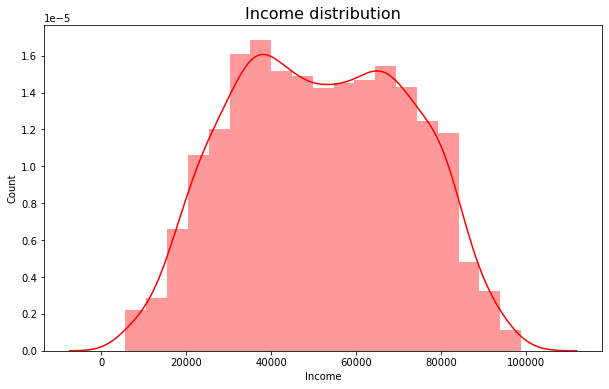

In [23]:
plt.figure(figsize=(10,6))
sns.distplot(df['Income'], hist=True, color = 'red')
plt.title('Income distribution', size=16)
plt.ylabel('Count');

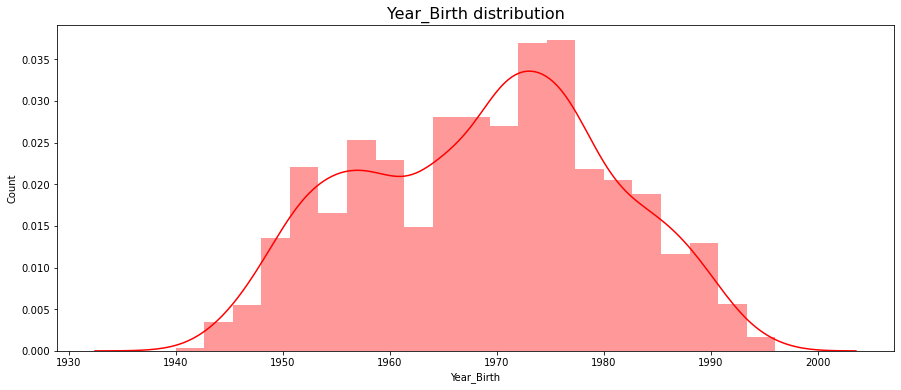

In [24]:
plt.figure(figsize=(15,6))
sns.distplot(df['Year_Birth'], norm_hist=True, color = 'red')
plt.title('Year_Birth distribution', size=16)
plt.ylabel('Count');

In [25]:
# Некоторые выбросы уже устранили, построим распределения по некоторым другим стобцам

<AxesSubplot:>

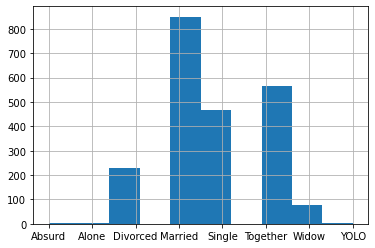

In [26]:
df['Marital_Status'].sort_values().hist()

<AxesSubplot:>

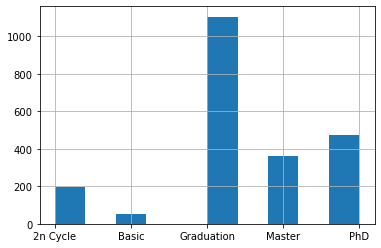

In [27]:
df['Education'].sort_values().hist()

<AxesSubplot:>

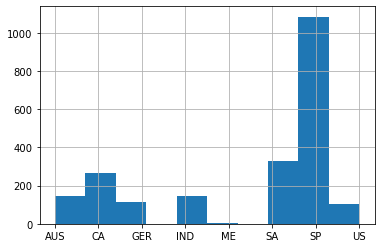

In [28]:
df['Country'].sort_values().hist()

In [29]:
# Коненчо, я делал это выборочно, но даже так видно, что есть очень мало значений одной категории, 
# что может быть интерпритированно как выброс. Давайте еще более точно посчитаем кол-во значений 
# и тогда уже придем в выводу

In [30]:
# df['Country'].describe(include='all')
df['Country'].value_counts()

SP     1084
SA      331
CA      264
AUS     147
IND     143
GER     116
US      105
ME        3
Name: Country, dtype: int64

In [31]:
df['Marital_Status'].value_counts()

Married     850
Together    566
Single      467
Divorced    227
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [32]:
df['Education'].value_counts()

Graduation    1104
PhD            473
Master         364
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [33]:
# Все таки удалю некоторые, хотя я сам до конца не уверен, потому что, если строить всякие регрессии или класстеризации
# то может быть полезно, убрать мало повторяющиеся значения, но тут мы просто анализируем покупки/строим графики
# без сильной привязонности к категориальным признакам, поэтому хз

In [34]:
df.drop(df[df['Country'] == 'ME'].index, inplace = True)
df.drop(df[df['Marital_Status'] == 'Absurd'].index, inplace = True)
df.drop(df[df['Marital_Status'] == 'Alone'].index, inplace = True)
df.drop(df[df['Marital_Status'] == 'YOLO'].index, inplace = True)

In [35]:
df.describe() 

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,...,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000
mean,5579.696748,1968.876317,51639.208887,0.443885,0.507558,49.191480,306.343564,26.397160,165.071461,37.665140,...,2.628035,5.834173,5.322034,0.073752,0.073752,0.071461,0.062758,0.013284,0.148420,0.009162
std,3245.026478,11.699072,20456.496592,0.537706,0.544797,28.927863,337.722595,39.666394,215.730725,54.588932,...,2.736182,3.224702,2.351415,0.261426,0.261426,0.257653,0.242582,0.114516,0.355597,0.095299
min,0.000000,1940.000000,5648.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2812.500000,1959.000000,35284.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5455.000000,1970.000000,51315.000000,0.000000,0.000000,50.000000,178.000000,8.000000,68.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8415.000000,1977.000000,68211.000000,1.000000,1.000000,74.000000,506.000000,33.000000,232.500000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,98777.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,984.000000,259.000000,...,11.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
# Распределение стало лучше, держу в курсе

## Задание 3 (1 балл): новые признаки

Подумайте, какие осмысленные признаки можно создать из имеющихся? Придумайте как минимум 2 и добавьте их, содержательно описав, почему вы их добавляете и по какому принципу.

In [37]:
# кол-во лет информативнее, сумма покупок может выступать как целевая переменная, в общем логичнА
now = 2022
df['Age'] = now - df['Year_Birth']
df.drop(columns = ['Year_Birth'],axis = 1)

df['TotalPurchases'] = df[[col for col in df.columns if 'Purchases' in col]].sum(axis=1)

## Задание 4 (2.5 балла): время статистики!

Рассчитайте все описательные статистики для категориальных переменных (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!). Опишите, какие выводы вы можете сделать из полученных данных.

In [38]:
# https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical
categorical = df.select_dtypes(exclude = np.number)
for i in categorical.columns:
    display(categorical[i].value_counts())

Graduation    1101
PhD            469
Master         361
2n Cycle       198
Basic           54
Name: Education, dtype: int64

Married     850
Together    565
Single      465
Divorced    227
Widow        76
Name: Marital_Status, dtype: int64

2012-08-31    12
2013-02-14    11
2012-09-12    11
2014-05-22    10
2014-05-12    10
              ..
2014-06-04     1
2014-01-09     1
2013-11-09     1
2013-05-16     1
2012-09-01     1
Name: Dt_Customer, Length: 662, dtype: int64

SP     1084
SA      331
CA      259
AUS     146
IND     142
GER     116
US      105
Name: Country, dtype: int64

In [39]:
display(categorical.nunique())

Education           5
Marital_Status      5
Dt_Customer       662
Country             7
dtype: int64

Рассчитайте все описательные статистики для количественных переменных.  (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!) Опишите, какие выводы вы можете сделать из полученных данных (хотя бы про какие-то 3 признака).

In [40]:
numerical = df.select_dtypes(include = np.number)
for i in numerical.columns:
    display(numerical[i].value_counts())

1826     1
4548     1
9503     1
10704    1
2669     1
        ..
569      1
5025     1
5832     1
3262     1
4070     1
Name: ID, Length: 2183, dtype: int64

1976    87
1971    84
1975    81
1972    78
1978    76
1970    74
1965    73
1969    69
1974    68
1973    67
1956    55
1979    52
1952    52
1968    51
1958    51
1966    50
1959    50
1977    49
1960    49
1954    49
1955    48
1962    44
1967    44
1963    43
1982    43
1951    42
1986    41
1964    41
1983    40
1957    40
1980    39
1984    38
1981    38
1953    35
1961    35
1985    32
1989    29
1950    29
1949    28
1988    28
1987    27
1948    21
1990    18
1947    16
1946    16
1991    15
1992    13
1944     7
1945     7
1943     6
1995     5
1994     3
1993     3
1996     2
1941     1
1940     1
Name: Year_Birth, dtype: int64

7500.0     12
39922.0     3
18690.0     3
46098.0     3
63841.0     3
           ..
33697.0     1
21063.0     1
61346.0     1
46086.0     1
94871.0     1
Name: Income, Length: 1948, dtype: int64

0    1260
1     877
2      46
Name: Kidhome, dtype: int64

0    1126
1    1006
2      51
Name: Teenhome, dtype: int64

56    36
30    32
54    31
46    31
92    30
      ..
69    14
5     13
22    13
7     12
44    11
Name: Recency, Length: 100, dtype: int64

2      39
6      36
5      35
4      33
1      33
       ..
731     1
913     1
294     1
262     1
169     1
Name: MntWines, Length: 770, dtype: int64

0      389
1      150
2      117
3      112
4      101
      ... 
148      1
154      1
140      1
189      1
143      1
Name: MntFruits, Length: 157, dtype: int64

7      52
5      49
11     49
8      43
6      42
       ..
569     1
174     1
185     1
274     1
701     1
Name: MntMeatProducts, Length: 547, dtype: int64

0      377
2      148
3      128
4      105
6       81
      ... 
231      1
247      1
218      1
198      1
167      1
Name: MntFishProducts, Length: 182, dtype: int64

0      408
1      153
2      121
3       97
4       78
      ... 
191      1
176      1
99       1
196      1
113      1
Name: MntSweetProducts, Length: 175, dtype: int64

4      68
3      67
12     62
1      62
5      62
       ..
169     1
160     1
204     1
173     1
123     1
Name: MntGoldProds, Length: 207, dtype: int64

1     954
2     491
3     292
4     185
5      91
6      60
7      39
0      31
8      14
9       8
11      5
10      5
12      3
13      3
15      2
Name: NumDealsPurchases, dtype: int64

2     366
1     344
3     331
4     275
5     219
6     198
7     151
8     102
9      74
11     43
10     42
0      37
23      1
Name: NumWebPurchases, dtype: int64

0     563
1     486
2     274
3     182
4     180
5     135
6     126
7      79
8      53
10     46
9      40
11     19
Name: NumCatalogPurchases, dtype: int64

3     483
4     316
2     217
5     211
6     173
8     146
7     139
10    123
9     106
12    104
13     80
11     80
1       3
0       2
Name: NumStorePurchases, dtype: int64

7     387
8     335
6     333
5     277
4     215
3     202
2     197
1     142
9      82
0       6
10      3
20      2
17      1
19      1
Name: NumWebVisitsMonth, dtype: int64

0    2022
1     161
Name: AcceptedCmp3, dtype: int64

0    2022
1     161
Name: AcceptedCmp4, dtype: int64

0    2027
1     156
Name: AcceptedCmp5, dtype: int64

0    2046
1     137
Name: AcceptedCmp1, dtype: int64

0    2154
1      29
Name: AcceptedCmp2, dtype: int64

0    1859
1     324
Name: Response, dtype: int64

0    2163
1      20
Name: Complain, dtype: int64

46    87
51    84
47    81
50    78
44    76
52    74
57    73
53    69
48    68
49    67
66    55
43    52
70    52
54    51
64    51
56    50
63    50
45    49
62    49
68    49
67    48
60    44
55    44
59    43
40    43
71    42
36    41
58    41
39    40
65    40
42    39
38    38
41    38
69    35
61    35
37    32
33    29
72    29
73    28
34    28
35    27
74    21
32    18
75    16
76    16
31    15
30    13
78     7
77     7
79     6
27     5
28     3
29     3
26     2
81     1
82     1
Name: Age, dtype: int64

7     148
5     143
4     124
6     121
17    113
9     100
16    100
19     98
20     94
21     94
8      93
22     92
23     86
18     79
10     78
12     70
15     69
25     66
26     65
11     64
24     55
14     54
13     44
27     36
28     34
29     17
32     12
31     11
30     10
34      4
33      4
2       2
35      1
39      1
1       1
Name: TotalPurchases, dtype: int64

In [41]:
display(numerical.nunique())

ID                     2183
Year_Birth               56
Income                 1948
Kidhome                   3
Teenhome                  3
Recency                 100
MntWines                770
MntFruits               157
MntMeatProducts         547
MntFishProducts         182
MntSweetProducts        175
MntGoldProds            207
NumDealsPurchases        15
NumWebPurchases          13
NumCatalogPurchases      12
NumStorePurchases        14
NumWebVisitsMonth        14
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Age                      56
TotalPurchases           35
dtype: int64

Выберите 3 интересующих вас количественных признака и рассчитайте релевантные с вашей точки зрения описательные статистики для этих признаков, сгруппировав данные по семейному положению, образованию, стране. Какие закономерности вы можете отметить? Как их можно проинтерпретировать? 

In [42]:
df_num = df[['Income','Age','TotalPurchases']]
df_cat = df[['Marital_Status','Education', 'Country']]

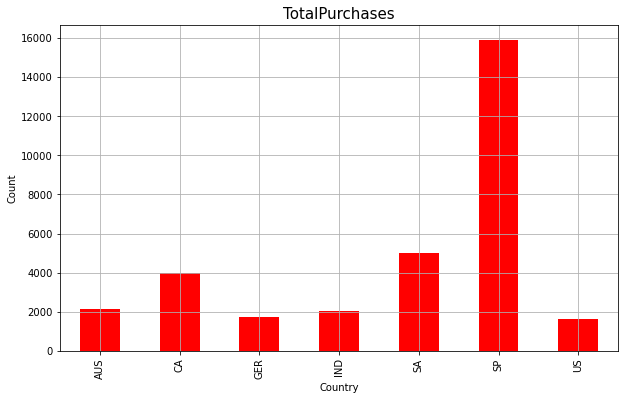

In [43]:
plt.figure(figsize=(10,6))
df.groupby('Country')['TotalPurchases'].sum().plot(kind='bar', color='red')
plt.title('TotalPurchases', size=15)
plt.ylabel('Count')
plt.grid()

In [44]:
# Испания топ 1 по покупкам, но тут в целом данные в основном про них

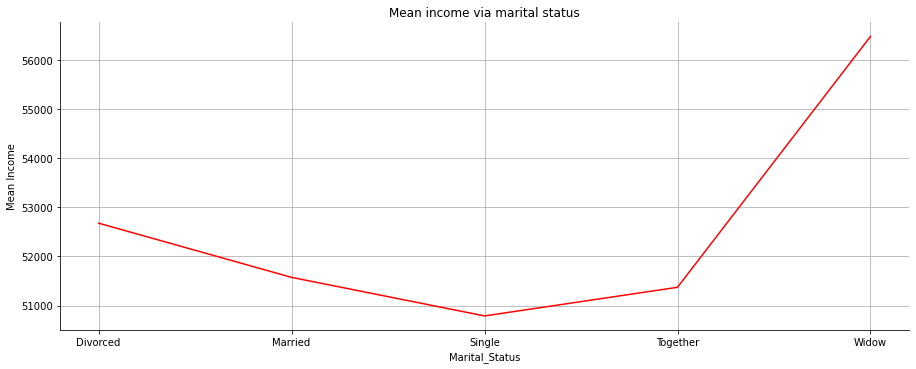

In [45]:
ax = sns.relplot(x='Marital_Status', y='Income',
                 data = df[['Marital_Status', 'Income']].groupby('Marital_Status', as_index=False).mean(),
                 color = 'red', kind="line")
ax.figure.set_size_inches(15, 5)
ax.set(title='Mean income via marital status', xlabel='Marital_Status', ylabel='Mean Income')
plt.grid()
plt.show()

In [46]:
# Вдовы больше получают, хмм, https://www.nytimes.com/2018/11/17/business/widows-financial-independence.html
# Интересный факт, у разведенных в среднем больше зарплата, вот здесь тоже что-то проаналированно
# https://www.cnbc.com/2018/10/10/being-rich-may-increase-your-odds-of-divorce.html

In [47]:
df.loc[df['Marital_Status'] == 'Widow'].Income.mean()

56481.55263157895

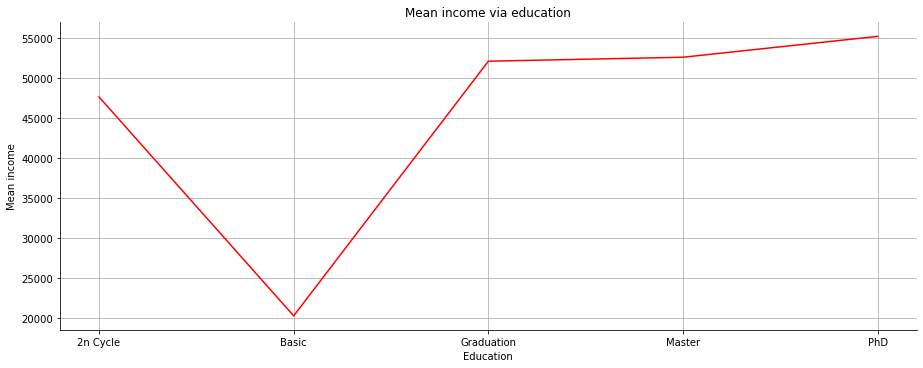

In [48]:
ax = sns.relplot(x='Education', y='Income',
                 data = df[['Education', 'Income']].groupby('Education', as_index=False).mean(), color = 'red', kind='line')
ax.figure.set_size_inches(15, 5)
ax.set(title='Mean income via education', xlabel='Education', ylabel='Mean income')
plt.grid()
plt.show()

In [49]:
# Образование решает, но не всегда https://www.cnbc.com/2021/10/13/more-education-doesnt-always-get-you-more-money-report-finds.html

In [50]:
df.loc[df['Education'] == 'Basic'].Income.mean()

20306.25925925926

In [51]:
# Попытался поймать интересную особенность.
# Больше всего PhD в Испании, и они зарабатывают в среднем так же, как простой житель Авсрии и Phd в Америке сильно больше

## Задание 5 (1 балл): корреляции

Найдите три самых сильных линейных взаимосвязи.Опишите, между какими признаками вы их нашли и содержательно проинтерпретируйте, почему (с вашей точки зрения) эти показатели связаны. 

_важно: необходимо вывести именно с помощью кода 3 пары самых сильно скоррелированных признака, а не искать их глазами в матрице корреляций_

In [52]:
# уберем явно коррелирующие признаки
corr_df = df.drop(columns=['ID', 'Year_Birth', 'Kidhome', 'Teenhome','Dt_Customer',
                           'TotalPurchases','Complain',
                      'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                      'AcceptedCmp4', 'AcceptedCmp5', 'Response' ])

In [53]:
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
corr_matrix =corr_df.corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
sol.head(10)

Income           NumCatalogPurchases    0.735329
                 MntWines               0.735014
                 MntMeatProducts        0.727503
MntMeatProducts  NumCatalogPurchases    0.709187
MntWines         NumCatalogPurchases    0.690478
Income           NumStorePurchases      0.685664
                 NumWebVisitsMonth      0.650360
MntWines         NumStorePurchases      0.637889
MntMeatProducts  MntFishProducts        0.606920
MntWines         MntMeatProducts        0.605620
dtype: float64

In [54]:
# Больше денег, больше покупок! Вроде все и так логично...
# https://www.usatoday.com/story/money/2019/08/05/income-increase-spending-more-dont-fall-prey-to-lifestyle-creep/39883509/

## Задание 6 (2 балла) : визуализации

Придумайте и постройте как минимум 6 содержательных визуализаций, которые будут иллюстрировать те или иные выводы, которые вы сделали на основе данных. К каждой визуализации должна прилагаться содержательная текстовая интерпретация. Каждая визуализация должна быть грамотно оформлена, с соблюдением всем правил. Необходимо задействовать не менее 4 типов диаграмм. 

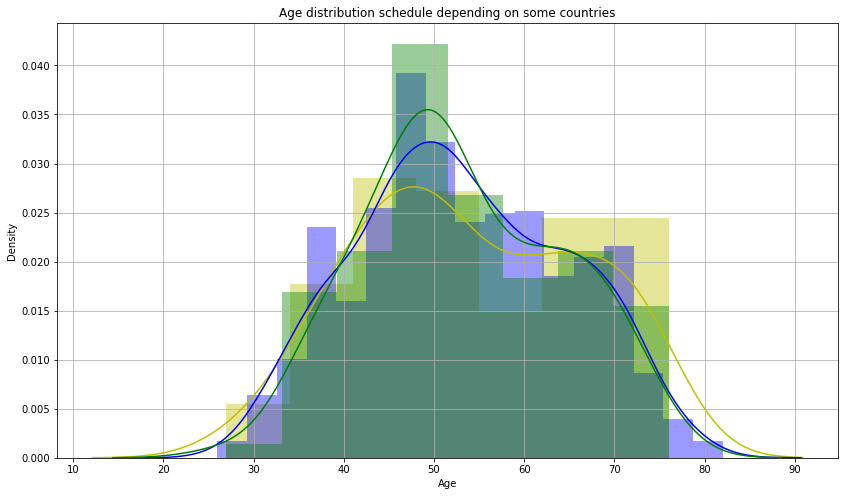

In [55]:
plt.figure(figsize=(14,8))
plt.title("Age distribution schedule depending on some countries")
sns.distplot(df[(df['Country'] == 'US')]['Age'], color = 'y')
sns.distplot(df[(df['Country'] == 'SP')]['Age'], color = 'blue')
sns.distplot(df[(df['Country'] == 'GER')]['Age'], color = 'green')
plt.grid()
plt.show()

In [56]:
( df[(df['Country'] == 'US')]['Age'].mean(), 
 df[(df['Country'] == 'SP')]['Age'].mean(), 
 df[(df['Country'] == 'GER')]['Age'].mean() )

(54.01904761904762, 53.140221402214024, 53.14655172413793)

In [57]:
# В целом жители данных европейских стран имеют высокий средний возраст

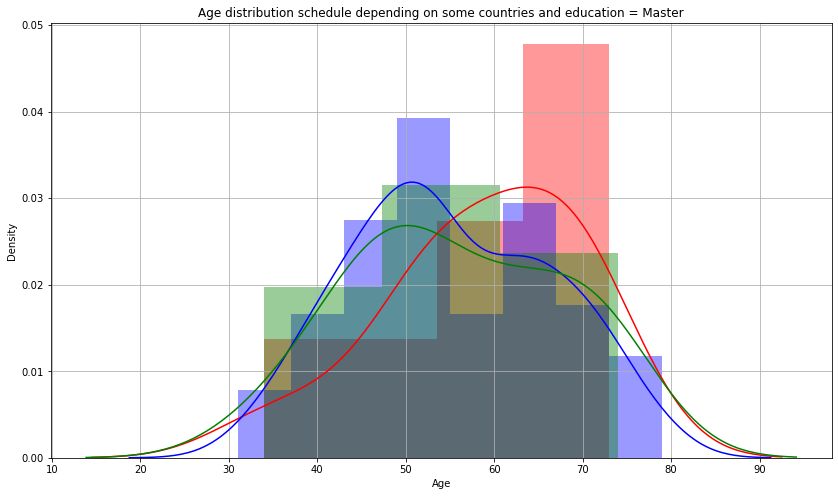

In [58]:
plt.figure(figsize=(14,8))
plt.title("Age distribution schedule depending on some countries and education = Master")
sns.distplot(df[(df['Country'] == 'US')& (df['Education'] == 'Master')]['Age'], color = 'r')
sns.distplot(df[(df['Country'] == 'SP')& (df['Education'] == 'Master')]['Age'], color = 'blue')
sns.distplot(df[(df['Country'] == 'GER')& (df['Education'] == 'Master')]['Age'], color = 'green')
plt.grid()
plt.show()

In [59]:
( df[(df['Country'] == 'US')& (df['Education'] == 'Master')]['Age'].mean(), 
df[(df['Country'] == 'SP')& (df['Education'] == 'Master')]['Age'].mean(),
df[(df['Country'] == 'GER')& (df['Education'] == 'Master')]['Age'].mean() )

(58.93333333333333, 55.11764705882353, 55.89473684210526)

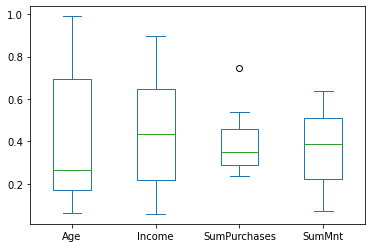

In [60]:
df1 = pd.DataFrame(np.random.rand(10, 4), columns=["Age", "Income", "SumPurchases", "SumMnt"])

df1.plot.box();
# Наиболее успешными продуктами являются вино и мясо

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2183 entries, 0 to 2192
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2183 non-null   int64         
 1   Year_Birth           2183 non-null   int64         
 2   Education            2183 non-null   object        
 3   Marital_Status       2183 non-null   object        
 4   Income               2183 non-null   float64       
 5   Kidhome              2183 non-null   int64         
 6   Teenhome             2183 non-null   int64         
 7   Dt_Customer          2183 non-null   datetime64[ns]
 8   Recency              2183 non-null   int64         
 9   MntWines             2183 non-null   int64         
 10  MntFruits            2183 non-null   int64         
 11  MntMeatProducts      2183 non-null   int64         
 12  MntFishProducts      2183 non-null   int64         
 13  MntSweetProducts     2183 non-nul

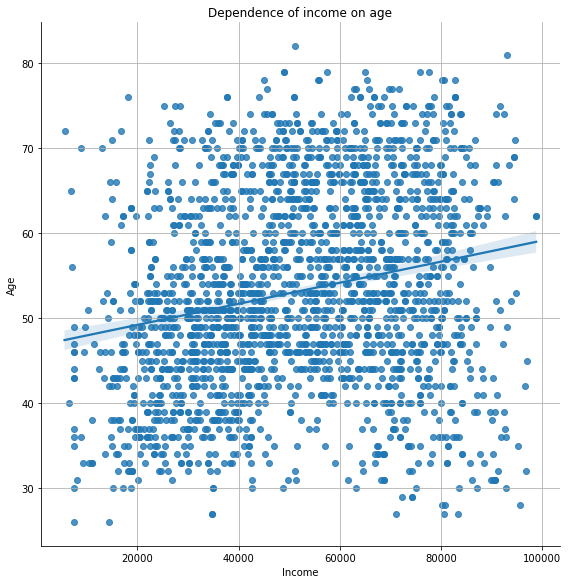

In [62]:
# https://stackoverflow.com/questions/35948995/seaborn-lmplot-got-an-unexpected-keyword-argument-figsize
sns.lmplot(size = 8,markers=["o"], x='Income',y='Age',data=df[['Age','Income']]).set(title='Dependence of income on age')
plt.grid()
plt.show()

In [63]:
# Чем старше, тем больше зарплата в среднем;)
( df.loc[df['Age'] > 50].Income.mean(), df.loc[df['Age'] < 50].Income.mean() )

(55153.70107349298, 46923.535794183445)

In [64]:
a = df['NumDealsPurchases'].sum()
b = df['NumWebPurchases'].sum()
c = df['NumCatalogPurchases'].sum()
mnt_total = [a, b, c, df['NumStorePurchases'].sum(), df['NumWebVisitsMonth'].sum()]

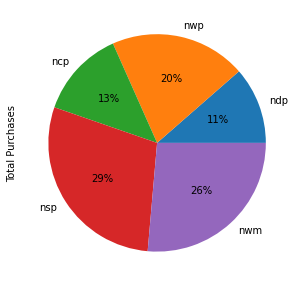

In [65]:
series = pd.Series(mnt_total, index=["ndp", "nwp", "ncp", 'nsp', 'nwm'], name="Total Purchases")

series.plot.pie(figsize=(10, 5),autopct='%1.0f%%');

In [66]:
# Максимум у nsp, nwm, nwp - 
# 1. NumCatalogPurchases
# 2. NumWebVisitsMonth
# 3. NumWebPurchases

Text(0, 0.5, 'Count')

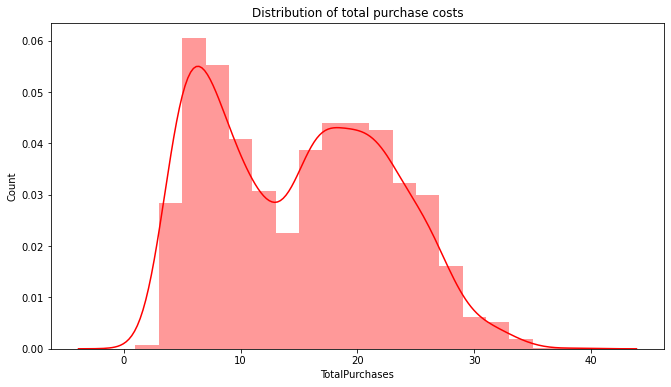

In [67]:
plt.figure(figsize=(11,6))
sns.distplot(df['TotalPurchases'], norm_hist=True, color = 'red')
plt.title('Distribution of total purchase costs')
plt.ylabel('Count')

Text(0.5, 1.0, 'Average spending on wine in different countries')

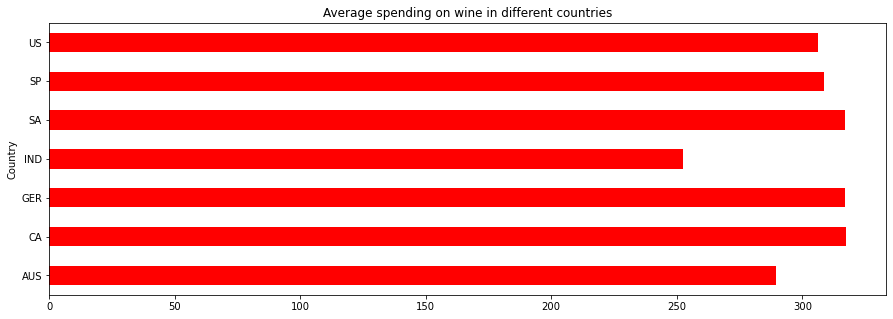

In [68]:
plt.figure(figsize=(15,5))
df.groupby('Country')['MntWines'].mean().plot(kind='barh', color = 'red').set_title(
    "Average spending on wine in different countries")

In [69]:
# В SA тратят больше всего на вино. ПОДВЕРЖДЕНО
# http://www.statssa.gov.za/?p=12169#:~:text=SA%20households%20spend%20more%20on%20wine%20than%20on%20coffee&text=Wine%20takes%20up%207%2C2,that%20households%20spend%20money%20on.

## Задание 7 (1 балл): немного исследований

Попробуйте найти в данных какую-то классную интересную особенность. Может быть, рыбу едят только неженатые? Или самый большой заработок и потребление фруктов у людей без образования? Приведите все расчеты, и визуализации для обнаруженного факта. Он должен быть правда интересным и удивлять! Попробуйте описать, почему (как вам кажется) так получилось.

Text(0.5, 1.0, 'Зависимость трат на мясо от образования')

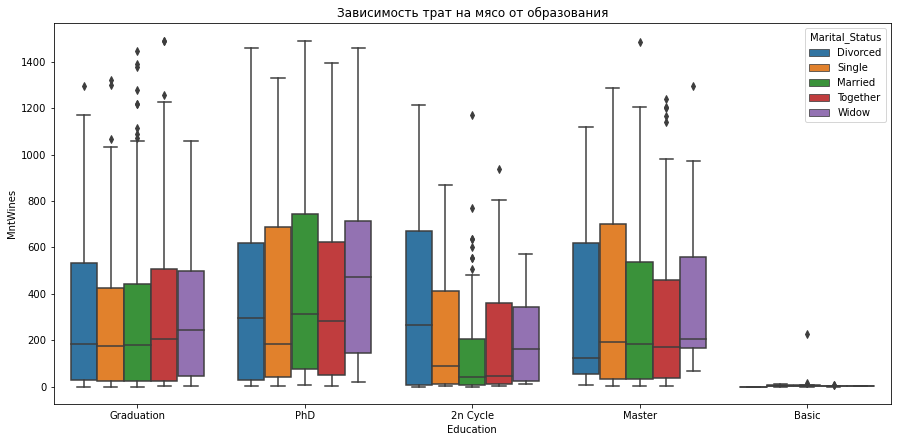

In [70]:
plt.figure(figsize=(15,7))
sns.boxplot(x=df['Education'], y=df['MntWines'], 
            hue=df['Marital_Status']).set_title("Зависимость трат на мясо от образования")

In [71]:
( df.loc[df['Education'] == 'PhD'].MntWines.mean(),
 df.loc[df['Education'] == 'Master'].MntWines.mean(),
 df.loc[df['Education'] == 'Graduation'].MntWines.mean(),
 df.loc[df['Education'] == '2n Cycle'].MntWines.mean(),
 df.loc[df['Education'] == 'Basic'].MntWines.mean()
)

(410.9488272921109,
 332.9778393351801,
 286.3496821071753,
 202.75757575757575,
 7.2407407407407405)

In [72]:
# В общем вино люди с PhD явно любят и не особо парятся где его брать, просто скорее всего есть отдельные места
# типа кб, где дешевле, а тут статисктика с конкретного магазина, поэтому может люди менее образованые, но прошаренные
# покупают это все в других местах
# https://thesiswhisperer.com/2011/02/03/drinking-and-your-phd/